# Latex Headers

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\adagger}[0]{\hat{a}^{\dagger}}$$
$$\newcommand{\ahat}[0]{\hat{a}}$$

# Cell Width Adjust

 - Execute the code below to adjust the width of the cells when editing.  
 - These cells will not be published to the book and are for editing convenience.

In [1]:
width = 70 #Width as a percentage of the screen

from IPython.display import display, HTML
display(HTML("<style>.jp-CodeCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-MarkdownCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-Cell-outputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))

# BASICS -- Quantum Optics

This course is about how we can leverage quantum systems as engineers.  As such it is not intended to be a course focused purely on the physics of quantum systems.  

In this course we will focus our attention on how to engineer quantum systems to securely transmit information, perform sensitive measurements, and compute among other things.  This will require us to develop a proficiency in understanding how quantum signals are generated, transmitted, and received.  It will also require us to understand the limitations of measurements, and how to account for noise.

While we will introduce several quantum engineering platforms in this course, a large number of concepts will be taught through the lens of quantum optics.  This chapter overviews basic concepts in quantum optics that will be drawn on throughout the course.  It should be used as both review and reference material.  For those interested in going deeper than the surface level overview we present here, references are provided at various points.

## Optical Modes

Often we deal with optical signals whose fields oscillate at a single angular frequency $\omega$.  At any given frequency, an optical signal can be written as a summation of modes.  These modes are distinguished by a variety of properties, such as their wave-vector $\mathbf{k}$ or polarization (e.g. linear horizontal, linear vertical, right-hand circular, etc.).  

In most cases, each input or output signal populates a single mode.

## The Vacuum State $\ket{0}$

The vacuum state represents the condition that no photon populates any mode.  This can be expanded as:

$\ket{0} = \ket{0}_a\ket{0}_b\ldots\ket{0}_m\ket{0}_n\ldots$,

where, for example, $\ket{0}_n$ represents zero photons for mode $n$.  

Here, we have labeled the modes $a$, $b$, $c$, $\ldots$ for convenience, but it should be noted that there can be infinite number of possible modes.

## Photon Number States: $\ket{N}$

Number states are those that represent a mode populated with a precise number of photons.  Such states are ubiquitous in quantum engineering applications.     

For instance, a single photon in mode $m$ can be written as:

$\ket{1}_m = \ket{0}_a\ket{0}_b\ldots\ket{0}_l\ket{1}_m\ket{0}_n\ldots$.

Likewise, for N-photons in mode $m$:

$\ket{N}_m = \ket{0}_a\ket{0}_b\ldots\ket{0}_l\ket{N}_m\ket{0}_n\ldots$.

## The Creation Operator: $\adagger$

The creation operator acts to increase the photon number in a particular mode by 1. For instance:

$\adagger_m \ket{0}_m = \ket{1}_m$

More generally:

$\adagger_m \ket{N}_m = \sqrt{N + 1}\ket{N + 1}$

## The Annihilation Operator: $\ahat$

The annihilation operator acts to decrease the photon number in a particular mode by 1.  For instance:

$$\ahat_m \ket{1}_m = \ket{0}_m.$$

More generally:

$$\ahat_m \ket{N}_m = \sqrt{N}\ket{N - 1}.$$

Note that:

$$\ahat_m \ket{0}_m = 0.$$

## Commutation Relation

It's important to note that the annihilation and creation operators **do not** commute.  They have the following commutation relation

$$ [\ahat_m, \adagger_n] \equiv \ahat_m \adagger_n - \adagger_m\ahat_n = \delta_{mn}, $$

where $\delta_{mn} = 1$ if $m = n$ and $\delta_{mn} = 0$ if $m \neq n$.

This relation can be quite useful, in particular for ensuring operators are in "normal order" which we will describe in detail when reviewing the coherent state below.

## The Number Operator: $\hat{N} = \adagger\ahat$

As the name implies, the number operator relates to the number of photons contained within a mode.  It is related to the annihilation and creation operators:

$\hat{N}_m = \adagger_m\ahat_m$.  

Often times we are interested in the time-averaged number of photons in a state.  For instance, consider the state $\ket{\psi_m}.  The time averaged number of photons in this state would then be:

$\bra{\psi}_m\hat{N}_m\ket{\psi}_m$.  

Using the properties of $\ahat$ and $\adagger$, you can easily show that:

$\bra{N}_m \hat{N}_m \ket{N}_m = N$.

## The Field Operators

The annihilation and creation operators are also intrinsically related to the electric field of a state.  In fact, they arise as a result of quantizing the electric field.  

```{note}
The quantization of the electromagnetic field is discussed in many textbooks.  For instance, see the treatment in Ref. {cite:p}`townsendModernApproachQuantum2000`, or the more extensive treatment in Ref. {cite:p}`kongElectromagneticWaveTheory2008`.  
```

The operator relating to the "in-phase" component of the electric field is expressed as:

$$\hat{A}^{(1)} = \frac{\ahat + \adagger}{2},$$

and that relating to the "quadrature" component of the electric field as:

$$\hat{A}^{(2)} = \frac{\ahat - \adagger}{2i}.$$

Taking the expectation of either $\hat{A}^{(1)}$ or $\hat{A}^{(2)}$ provides the time-averaged output of the in-phase and quadrature components of the field respectively.  

Note that it can be useful to define the more general form:

$$\hat{A}^{(\theta)} = \frac{\ahat e^{-i\theta} + \adagger e^{i\theta}}{2}$$

where $\hat{A}^{(1)} = \hat{A}^{(\theta)}(0)$, and $\hat{A}^{(2)} = \hat{A}^{(\theta)}(\pi/2)$

### Relating the Field Operators to Classical Electromagnetic Waves

To get a better sense for these operators, let's consider the electric field of a classical light wave.  For a single frequency at one point in space, we can write the field as

$$ E(t) = |\alpha|\cos(\omega_0 t + \varphi) \mathrm{.}$$

There are three important paramters that describe such a wave:

 1. The central frequency $\omega_0$
 2. The amplitude $|\alpha|$ 
 3. The phase offset $\varphi$
 
However, by phasor analysis, we can also write the field as

$$E(t) = \mathrm{Re}\lbrace \alpha e^{i\omega_0 t} \rbrace \mathrm{,}$$

where

$$\alpha = |\alpha|e^{i\varphi} = \mathrm{Re} \lbrace \alpha \rbrace + i\mathrm{Im} \lbrace \alpha \rbrace \mathrm{.}$$

This means that another set of equally valid parameters to describe the field are:

 1. The central frequency $\omega_0$
 2. The in-phase component: $\mathrm{Re} \lbrace \alpha \rbrace$
 3. The quadrature component: $\mathrm{Im} \lbrace \alpha \rbrace$
 
```{note}
For more on in-phase and quadrature component representation of waves see the [Wikipedia page](https://en.wikipedia.org/wiki/In-phase_and_quadrature_components).
```

Note that

$$ \mathrm{Re} \lbrace \alpha \rbrace = \frac{\alpha + \alpha^*}{2} \mathrm{,}$$

and

$$\mathrm{Im} \lbrace \alpha \rbrace = \frac{\alpha - \alpha^*}{2i} \mathrm{.}$$

To explicitly demonstrate the relation to the field operators, consider the expectation the in-phase and quadrature field operators with a coherent state:

$$ \bra{\alpha} \frac{\ahat + \adagger}{2} \ket{\alpha} = \frac{\alpha + \alpha^*}{2}$$

and

$$ \bra{\alpha} \frac{\ahat - \adagger}{2i} \ket{\alpha} = \frac{\alpha - \alpha^*}{2i} \mathrm{.}$$

This should now fully connect how the quantum field operators relate directly to the in-phase and quadrature representations of a classical electromagnetic wave of a single frequency.  Interferometric measurements using homodyne detection can be performed to directly observe these quantities.

(basics:mean-and-standard-deviation)=
## Mean and Standard Deviation Observables

A general concept of note is the determination of mean and standard deviation of an observable, such as photon number or field value.  As engineers, we are often just as concerned about noise and its reduction as we are about the signal itself.

The mean of an observable can be found by taking its expectation given the current state of the system $\ket{\psi}$.  For example, the mean photon number would be:

$$ N =  \bra{\psi}\hat{N}\ket{\psi}.$$

The standard deviation $\Delta N$ is found through the relation:

$$\Delta N = {\bigg \lbrace \bra{\psi} \hat{N}^2 \ket{\psi} - N^2 \bigg \rbrace }^{1/2}.$$

Calculation of such quantities are very important as they allow us to determine signal-to-noise ratios in our systems that are critical to their real-world operation.

```{note}
The approach above follows directly from how such values are obtained for random variables in statistics.  For example, see the definitions for [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) and [variance](https://en.wikipedia.org/wiki/Variance). 
```

## Common State Types and Their Properties

### The number state $\ket{N}$

As per its name, the number state contains a well-defined number of photons, such that 

$$N = \bra{N}\hat{N}\ket{N}.$$

The standard deviation of this photon number $\Delta N = 0$.  

What can be quite odd about such a state is that despite the fact that the photon number is unrestricted, the average field is always 0.  That is:

$$\langle \hat{A}^{(1)} \rangle = \langle \hat{A}^{(2)} \rangle = 0.$$

However, the standard deviation of the fields are certainly not zero, with:

$$\Delta A^{(\theta)} = \sqrt{2N + 1}/2.$$

So, while these states carry a very well-defined amount of photons, and hence energy ($N\hbar\omega$), they carry it in fields of increasing variance having an average value of 0.

A useful way to visualize quantum fields is to make a two-dimensional plot with $A^{(1)}$ on the $x$-axis, and $A^{(2)}$ on the $y$-axis.  In this configuration, $\theta$ is then the angle going counter-clockwise from the $x$-axis.  Then, you mark the region whos center is the mean value of $A^{(1)}$ and $A^{(2)}$ of the state, with a width of $2\Delta A^{(\theta)}$ for each value of $\theta$.  This allows a quick visual representation of both the average value and uncertainty of the fields of any given state.

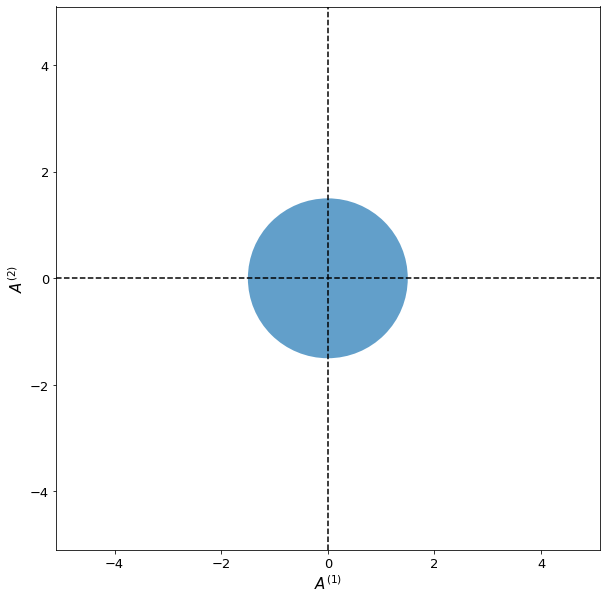

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from myst_nb import glue

fig = plt.figure()
ax = fig.add_subplot()

A = 0
phi = 0
delA = np.sqrt(2*4 + 1)/2


A1 = A*np.cos(phi)
A2 = A*np.sin(phi)


# add a circle
patch = mpatches.Ellipse((A1, A2), 
                         width=delA*2, 
                         height=delA*2, 
                         ec="none", 
                         color='tab:blue',
                         alpha=0.7)
ax.add_patch(patch)
ax.set_xlim(-5.1, 5.1)
ax.set_ylim(-5.1, 5.1)

ax.set_xlabel('$A^{(1)}$', fontsize=15)
ax.set_ylabel('$A^{(2)}$', fontsize=15)

ax.axvline(0, color='black', linestyle='--')
ax.axhline(0, color='black', linestyle='--')

ax.tick_params(labelsize=13) 

plt.gca().set_aspect('equal')

fig.set_size_inches(10, 10)

glue("number_state_field_representation", fig, display=False)

```{glue:figure} number_state_field_representation
:figwidth: 600px
:name: "fig-number-state-field-representation"

Field representations for a number state with $N=4$.
```

### The coherent state $\ket{\alpha}$

In contrast to number states, classical electromagnetic waves are  described as a collection of plane waves that oscillates smothly in time and space. These plane waves have regions of high and low fields that are well defined as a function of phase.  There are many applications in quantum optics that use such "classical" sources of light (e.g. a continuous-wave laser source), so we need a way to describe it within our quantum framework.  For this purpose, we can use *coherent states*.    

We denote a coherent state as $\ket{\alpha}$, where $\alpha$ is a complex number whos amplitude relates to the electric field strength, and whos phase relates to the phase offset of the electromagnetic wave.  As with number states, these states can also have other properties, such as polarization and spatial mode.  

An interesting and useful fact is that a coherent state is nothing more than a distribution of number states all added together in a particular way.  For instance, a classical state populating the $m^\text{th}$ mode is represented as:

$$ \ket{\alpha}_m = e^{-|\alpha|^2/2} \sum_n \frac{\alpha^n}{\sqrt{n!}} \ket{n}_m. $$

We leave it as an exercise to show that

$$ \ahat_m \ket{\alpha}_m = \alpha \ket{\alpha}_m, $$

and

$$ \bra{\alpha}_m \adagger_m = \alpha^* \bra{\alpha}_m.  $$

This makes working with coherent states very easy, so long as you put all expressions in "normal order", meaning annihilation operators always come before creation operators when multiplied out.

```{important}
Remember as we discussed above that quantum operators do not necessarily commute.  In particular, the creation and annihilation operators do not commute.  This means that we cannot simply move the annihilation operators to the left of creation operators.  

So how do we put things in normal order?  We take advantage of the commutation relation

$$ [\ahat, \adagger] = \ahat\adagger - \adagger\ahat = 1. $$

For example, take 

$$\hat{N}^2 = \adagger\ahat\adagger\ahat = \adagger\ahat + \adagger\adagger\ahat\ahat,$$

where we have used the commutation relation to achieve the final expression in normal order.
```

By using the relations above along with normal ordering of the annihilation and creation operators, it is easy to then show that the average photon number of a coherent state is

$$ N = |\alpha|^2, $$

and that the the standard deviation of the photon number is

$$ \Delta N = |\alpha|. $$

It turns out that the photon number distribution is that of a poisson distribution, which is consistent with such a relation between the mean and standard deviation.  

We can likewise use the above properties to show that

$$ A^{(\theta)} = |\alpha|\cos(\varphi - \theta), $$

where $\varphi = \arg{\alpha}$.  Also,

$$ \Delta A^{(\theta)} = 1/2.$$

The last part is interesting as it means that no matter how large alpha is, the field fluctuations stay the same, and are the same level as that of a vacuum state.   This is due to the fact that phase is very well defined for a coherent state.  Thus the photon contribution to the field is very well-defined, leaving only the remaining vacuum field fluctuations.  This is in spite of the fact that the number of photons actually varies.  Compare this to a number state where there is no fluctuation in the number of photons, but the field fluctuates heavily on top of the ever-present vacuum fluctuations.

Again, it we can map out the field representation, which we have done below for a coherent state with $|\alpha| = 4$, and $\varphi = \pi/4$.

[//]: # "FIXME:  Add in a figure that shows the coherent state as a function of $\theta$ vs. a number state having the same average numer of photons N."

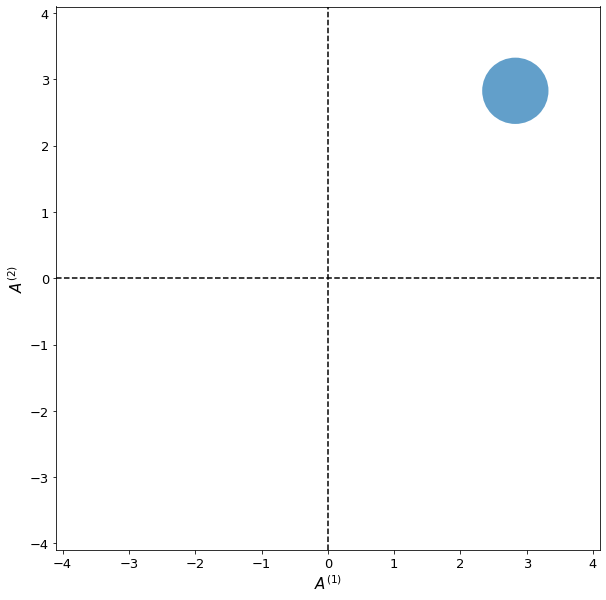

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from myst_nb import glue

fig = plt.figure()
ax = fig.add_subplot()

A = 4
phi = np.pi/4
delA = 1/2

#Determine projection onto A1 and A2 for center
A1 = A*np.cos(phi)
A2 = A*np.sin(phi)

# add a circle
patch = mpatches.Ellipse((A1, A2), 
                         width=delA*2, 
                         height=delA*2, 
                         ec="none", 
                         color='tab:blue',
                        alpha=0.7)
ax.add_patch(patch)
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-4.1, 4.1)

ax.set_xlabel('$A^{(1)}$', fontsize=15)
ax.set_ylabel('$A^{(2)}$', fontsize=15)

ax.axvline(0, color='black', linestyle='--')
ax.axhline(0, color='black', linestyle='--')

ax.tick_params(labelsize=13) 

plt.gca().set_aspect('equal')

fig.set_size_inches(10, 10)

glue("coherent_state_field_representation", fig, display=False)

```{glue:figure} coherent_state_field_representation
:figwidth: 600px
:name: "fig-coherent-state-field-representation"

Field representations for a coherent state with $|\alpha| = 4$, and $\varphi = \pi/4$.
```

(sec:quantum-optics-basics:squeezed-states)=
### Squeezed States

You might have heard of squeezed states.  Such states exhibit very interesting noise properties.  While there are more rigorous ways to develop notation for generalized squeezed states, lets use a simple example constructured from the vacuum state in addition to a two-photon number state:

$$ \ket{\psi_s} = \sqrt{1 - s^2}\ket{0} - s\ket{2}.$$

Using the properties of number states, you can show that the mean field is

$$ A^{(\theta)} = 0, $$

and that the standar deviation of the field fluctuations is

$$ \Delta A^{(\theta)} = { \bigg \lbrace 1/4 - s \sqrt{\frac{(1 - s^2)}{2}} \cos(2 \theta) + s^2 \bigg \rbrace  }^{1/2}.$$

Note that unlike in past cases, the field fluctions are now a function of $\theta$.  In fact, they are reduced in one quadrature, while increased in the other quadrature in general.  

It can be useful to look at a field represenatation for a couple of values.  Let's say $s = 0.25$ and $s=0$.

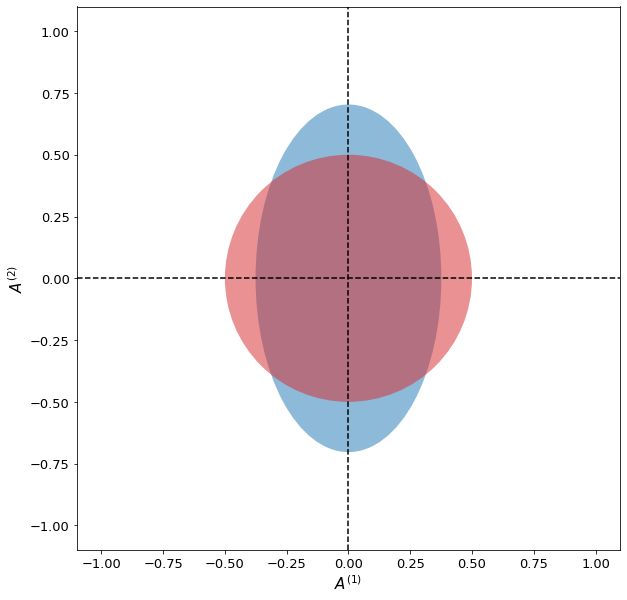

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from myst_nb import glue

fig = plt.figure()
ax = fig.add_subplot()


s = 0.25
delA1 = np.sqrt(1/4 - s*np.sqrt((1 - s**2)/2) + s**2)
delA2 = np.sqrt(1/4 + s*np.sqrt((1 + s**2)/2) + s**2)

A1 = 0
A2 = 0

# add a circle
patch = mpatches.Ellipse((A1, A2), 
                         width=delA1*2, 
                         height=delA2*2, 
                         ec="none", 
                         color='tab:blue', 
                         alpha=0.5)
ax.add_patch(patch)


s = 0.0
delA1 = np.sqrt(1/4 - s*np.sqrt((1 - s**2)/2) + s**2)
delA2 = np.sqrt(1/4 + s*np.sqrt((1 + s**2)/2) + s**2)

A1 = 0
A2 = 0

# add a circle
patch = mpatches.Ellipse((A1, A2), width=delA1*2, height=delA2*2, ec="none", color='tab:red', alpha=0.5)
ax.add_patch(patch)


ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

ax.set_xlabel('$A^{(1)}$', fontsize=15)
ax.set_ylabel('$A^{(2)}$', fontsize=15)

ax.axvline(0, color='black', linestyle='--')
ax.axhline(0, color='black', linestyle='--')

ax.tick_params(labelsize=13) 

plt.gca().set_aspect('equal')

fig.set_size_inches(10, 10)

glue("squeezed_state_vs_vac_state_field_representation", fig, display=False)

```{glue:figure} squeezed_state_vs_vac_state_field_representation
:figwidth: 600px
:name: "fig-squeezed-state-vs-vac-field-fluctuations"

Field representations for a vacuum state (red circle) and squeezed state $\ket{\psi_s} = \sqrt{1 - s^2}\ket{0} - s\ket{2}$ (blue circle) for $s=0.25$.

```

For $s = 0$ (the red circle), the state is nothing more than the vacuum state.  However, when $s = 0.25$ we arrive at the blue ellipse, where the fluctuations along $A^{(1)}$ have been reduced, while those along $A^{(2)}$ have been increased.  **As engineers, we can design systems that are only sensitive to the fields in one of the two quadratures (using [Homodyne detection](https://en.wikipedia.org/wiki/Homodyne_detection ) for example), thus enabling measurements below the noise floor set by the standard quantum limit (SQL, which is represented by the vacuum state here with $s = 0$).  We will discuss such measurements in detail.**

One final question of interest for $\ket{\psi_s}$ is what happens to the noise along the two quadratures $A^{(1)}$ and $A^{(2)}$ and how does this noise compare to the standard quantum limit (SQL) as we let $s$ vary from 0 to 1.

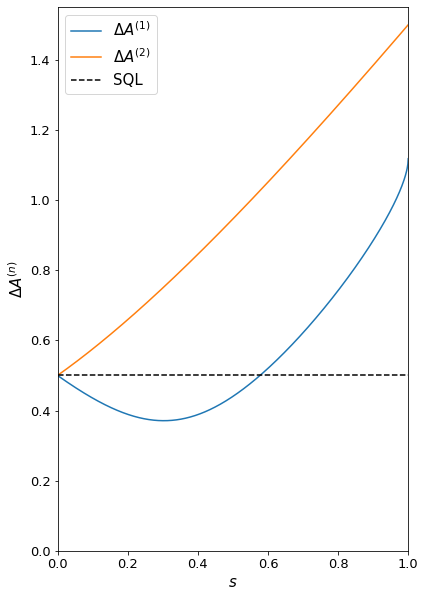

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from myst_nb import glue

fig = plt.figure()
ax = fig.add_subplot()


s = np.linspace(0, 1, 1000)
delA1 = np.sqrt(1/4 - s*np.sqrt((1 - s**2)/2) + s**2)
delA2 = np.sqrt(1/4 + s*np.sqrt((1 + s**2)/2) + s**2)


ax.plot(s, delA1, label="$\Delta A^{(1)}$")
ax.plot(s, delA2, label="$\Delta A^{(2)}$")
ax.axhline(0.5, color="black", linestyle="--", label='SQL')
    
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.55)
ax.set_xlabel('$s$', fontsize=15)
ax.set_ylabel('$\Delta A^{(n)}$', fontsize=15)
ax.tick_params(labelsize=13) 
ax.legend(fontsize=15)
    
plt.gca().set_aspect('equal')

fig.set_size_inches(10, 10)

glue("squeezed_field_fluctuations", fig, display=False)

```{glue:figure} squeezed_field_fluctuations
:figwidth: 600px
:name: "fig-squeezed-field-fluctuations"

Field fluctuations in each quadrature compared to the SQL.  
```

### The thermal state

Another state is the termals state, produced by radiation with random intensity and phase.

The thermal state is a statistical mixture of number states without specific phase relations between the number states.

The density operator in terms of the number state are given as

$$\hat{\rho} = \left[1 - \exp\left(-\frac{\hbar\omega}{k_BT} \right)\right ]\sum_n \exp\left( -\frac{n\hbar\omega}{k_BT} \right )|n\rangle\langle n|$$

The mean photon number is given by

$$\langle n\rangle = Tr \{ \hat{\rho}\hat{n} \} $$

And the probability of finding the mean photon number n is given by the distribution

$$P(n) = \frac{\langle n \rangle^n}{\left (1 + \langle n \rangle \right ) ^{1+n}}$$

The photon number variance is given as

$$ \left ( \Delta n\right )^2 = \langle n \rangle ^2 + \langle n \rangle$$

## References

```{bibliography}
:filter: docname in docnames
```

[//]: # "FIXME: Add in a short note on a generalized squeezer and how you represent it's creation and annihilation operators.  Also provide a schematic of the system."

[//]: # "FIXME: Flesh out a simple section getting to the essence of entanglement and a simple demonstration of entangled states."